# Imports & setup

In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/human-oral-tonsillitis-230421'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger
2022-06-24 16:44:48 ERROR Connection to dbBact failed. Error: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))


# Load the dataset
## this is the deblurred biom table from:
### "The human oral cavity microbiota composition during acute tonsillitis: a cross-sectional survey"
Yun Kit Yeoh, Man Hin Chan, Zigui Chen, Eddy W. H. Lam, Po Yee Wong, Chi Man Ngai, Paul K. S. Chan & Mamie Hu

BMC Oral Health volume 19, Article number: 275 (2019)

https://doi.org/10.1186/s12903-019-0956-5

In [7]:
dat=ca.read_amplicon('./all.biom','./map.joined.txt',normalize=10000,min_reads=1000)

2022-06-24 16:44:48 INFO loaded 240 samples, 1976 features
2022-06-24 16:44:48 WARNING These have metadata but do not have data - dropped (6): {'SRR9975219', 'SRR9975215', 'SRR9975212', 'SRR9975213', 'SRR9975214', 'SRR9975210'}
2022-06-24 16:44:48 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-24 16:44:48 INFO After filtering, 222 remain.


In [8]:
datc=dat.cluster_features(10)

2022-06-24 16:44:48 INFO After filtering, 1595 remain.


In [9]:
datc=datc.sort_samples('Source_material_ID')

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


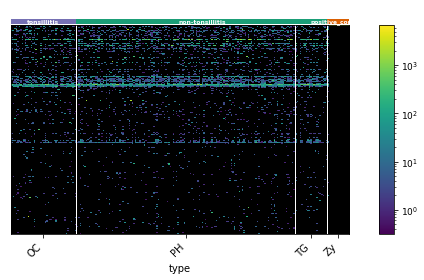

In [10]:
f=datc.sort_samples('type').plot(sample_field='type',barx_fields=['comment'])

In [11]:
datc.sample_metadata.comment.value_counts()

non-tonsillitis     165
tonsillitis          43
positive_control     14
Name: comment, dtype: int64

# Identify bacteria significantly higher in tonsillitis/non-tosillitis
(using dsFDR=0.1)

In [12]:
dd=datc.diff_abundance('comment','non-tonsillitis','tonsillitis',alpha=0.1,random_seed=2022)

2022-06-24 16:44:49 INFO 208 samples with both values
2022-06-24 16:44:49 INFO After filtering, 1585 remain.
2022-06-24 16:44:49 INFO 165 samples with value 1 (['non-tonsillitis'])
2022-06-24 16:44:50 INFO number of higher in non-tonsillitis: 59. number of higher in tonsillitis : 29. total 88


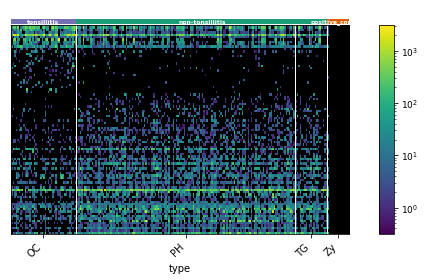

In [13]:
f=dd.sort_samples('type').plot(sample_field='type',barx_fields=['comment'])

2022-06-24 16:45:00 INFO Getting dbBact annotations for 88 sequences, please wait...
2022-06-24 16:45:00 INFO Limited to maximal annotationid: 7440
2022-06-24 16:45:06 INFO got 1267 annotations
2022-06-24 16:45:06 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-24 16:45:06 INFO Got 7580 annotation-sequence pairs
2022-06-24 16:45:06 INFO Added annotation data to experiment. Total 1267 annotations, 88 ASVs
2022-06-24 16:45:06 INFO Found 1 experiments ([774]) matching current experiment - ignoring them.
2022-06-24 16:45:08 INFO found 7 negative
2022-06-24 16:45:09 INFO found 7 positive


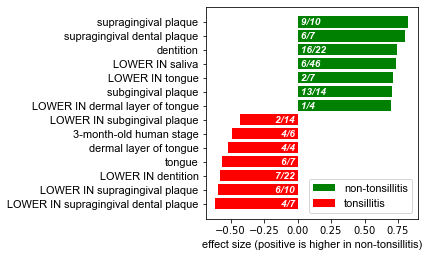

In [14]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [15]:
f.figure.savefig('./fig-term-enrichment.pdf')

In [16]:
e.feature_metadata[-10:]

,term,odif,pvals,num_enriched_exps,num_total_exps
dermal layer of tongue,dermal layer of tongue,-0.517241,0.000999,4,4
3-month-old human stage,3-month-old human stage,-0.488019,0.000999,4,6
LOWER IN subgingival plaque,LOWER IN subgingival plaque,-0.429573,0.000999,2,14
LOWER IN dermal layer of tongue,LOWER IN dermal layer of tongue,0.694915,0.000999,1,4
subgingival plaque,subgingival plaque,0.708358,0.000999,13,14
LOWER IN tongue,LOWER IN tongue,0.711864,0.000999,2,7
LOWER IN saliva,LOWER IN saliva,0.737580,0.000999,6,46
dentition,dentition,0.745178,0.000999,16,22
supragingival dental plaque,supragingival dental plaque,0.804793,0.000999,6,7
supragingival plaque,supragingival plaque,0.824664,0.000999,9,10


In [17]:
e.feature_metadata[:10]

,term,odif,pvals,num_enriched_exps,num_total_exps
LOWER IN supragingival dental plaque,LOWER IN supragingival dental plaque,-0.615430,0.000999,4,7
LOWER IN supragingival plaque,LOWER IN supragingival plaque,-0.594389,0.000999,6,10
LOWER IN dentition,LOWER IN dentition,-0.578025,0.000999,7,22
tongue,tongue,-0.561075,0.000999,6,7
dermal layer of tongue,dermal layer of tongue,-0.517241,0.000999,4,4
3-month-old human stage,3-month-old human stage,-0.488019,0.000999,4,6
LOWER IN subgingival plaque,LOWER IN subgingival plaque,-0.429573,0.000999,2,14
LOWER IN dermal layer of tongue,LOWER IN dermal layer of tongue,0.694915,0.000999,1,4
subgingival plaque,subgingival plaque,0.708358,0.000999,13,14
LOWER IN tongue,LOWER IN tongue,0.711864,0.000999,2,7


## Wordclouds for tonsillitis/healthy samples
We plot using sequences present(>=1 reads) in at least 30% of samples

2022-06-24 16:45:35 INFO After filtering, 1583 remain.
2022-06-24 16:45:35 INFO After filtering, 155 remain.
2022-06-24 16:45:35 INFO Getting dbBact annotations for 155 sequences, please wait...
2022-06-24 16:45:35 INFO Limited to maximal annotationid: 7440
2022-06-24 16:45:41 INFO got 1739 annotations
2022-06-24 16:45:41 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-24 16:45:41 INFO Got 16193 annotation-sequence pairs
2022-06-24 16:45:41 INFO Added annotation data to experiment. Total 1739 annotations, 155 ASVs
2022-06-24 16:45:41 INFO Found 1 experiments ([774]) matching current experiment - ignoring them.


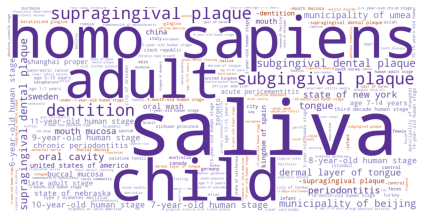

In [18]:
tt=datc.filter_samples('comment',['non-tonsillitis','tonsillitis'])
tt=tt.cluster_features(10)
f=db.draw_wordcloud(tt.filter_prevalence(0.3),max_id=7440,ignore_exp=True)

In [19]:
f.savefig('./fig-wordcloud-all.pdf')